# Homework 2: Machine Learning for Regression

In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [21]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [22]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df1 = df[cols]
df1

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## EDA

In [23]:
df1.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [24]:
skew_val = df['fuel_efficiency_mpg'].skew()
print("Skewness:", skew_val)

Skewness: -0.012062219273507922


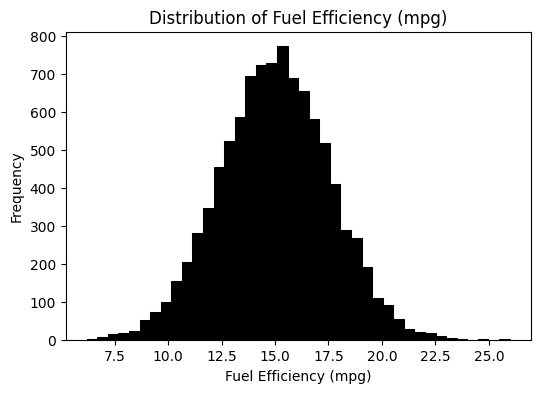

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel Efficiency (mpg)")
plt.show()

## Question 1. Missing values

There's one column with missing values. What is it?

In [26]:
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2. Median for horse power

What's the median (50% percentile) for variable 'horsepower'?

In [27]:
df1['horsepower'].median()

np.float64(149.0)

In [28]:
df1['horsepower'].quantile(0.5)

np.float64(149.0)

## Question 3. Filling NAs 

Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [66]:
# Training function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# RMSE helper
def rmse(y, y_pred):
    error = y - y_pred
    return round(np.sqrt((error ** 2).mean()), 2)

# Prepare features (same 4 input cols, excluding target)
def prepare_X(df):
    return df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values


In [67]:
# Keep only needed columns
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df1 = df1[cols].copy()

# Shuffle with seed 42
np.random.seed(42)
df1 = df1.sample(frac=1, random_state=42).reset_index(drop=True)

# Split 60/20/20
n = len(df1)
n_train = int(0.6 * n)
n_val   = int(0.2 * n)
n_test  = n - n_train - n_val

df_train = df1.iloc[:n_train]
df_val   = df1.iloc[n_train:n_train+n_val]
df_test  = df1.iloc[n_train+n_val:]

y_train = df_train.fuel_efficiency_mpg.values
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values


In [68]:
# Option A: fill missing horsepower with 0
df_train_0 = df_train.fillna(0)
df_val_0   = df_val.fillna(0)

X_train_0 = prepare_X(df_train_0)
X_val_0   = prepare_X(df_val_0)

# Train & predict
w0, w = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0 + X_val_0.dot(w)
rmse_0 = rmse(y_val, y_pred_0)


In [70]:
# Option B: fill missing horsepower with mean (train only!)
mean_hp = df_train['horsepower'].mean()

df_train_mean = df_train.fillna({'horsepower': mean_hp})
df_val_mean   = df_val.fillna({'horsepower': mean_hp})

X_train_mean = prepare_X(df_train_mean)
X_val_mean   = prepare_X(df_val_mean)

# Train & predict
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0 + X_val_mean.dot(w)
rmse_mean = rmse(y_val, y_pred_mean)

In [71]:
print("RMSE with 0 fill:", rmse_0)
print("RMSE with mean fill:", rmse_mean)

if rmse_0 < rmse_mean:
    print("Better option: With 0")
elif rmse_mean < rmse_0:
    print("Better option: With mean")
else:
    print("Better option: Both are equally good")


RMSE with 0 fill: 0.52
RMSE with mean fill: 0.47
Better option: With mean


## Question 4. Best regularization 

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [72]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # add regularization term
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [73]:
def predict(X, w0, w):
    return w0 + X.dot(w)


In [74]:
def rmse(y_true, y_pred):
    return round(np.sqrt(((y_true - y_pred) ** 2).mean()), 2)


In [75]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
results = {}

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred = predict(X_val_0, w0, w)
    results[r] = rmse(y_val, y_pred)

results


{0: np.float64(0.52),
 0.01: np.float64(0.52),
 0.1: np.float64(0.53),
 1: np.float64(0.53),
 5: np.float64(0.53),
 10: np.float64(0.53),
 100: np.float64(0.53)}

In [76]:
best_r = min(results, key=results.get)  # smallest r in case of ties
print("Validation RMSE per r:", results)
print("Best r:", best_r, "with RMSE:", results[best_r])


Validation RMSE per r: {0: np.float64(0.52), 0.01: np.float64(0.52), 0.1: np.float64(0.53), 1: np.float64(0.53), 5: np.float64(0.53), 10: np.float64(0.53), 100: np.float64(0.53)}
Best r: 0 with RMSE: 0.52


## Question 5. RMSE Standard Deviation

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [77]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def predict(X, w0, w):
    return w0 + X.dot(w)

def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

scores = []

for seed in range(10):
    # shuffle
    df_shuffled = df1.sample(frac=1, random_state=seed).reset_index(drop=True)

    # split
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val   = int(0.2 * n)
    
    df_train = df_shuffled.iloc[:n_train]
    df_val   = df_shuffled.iloc[n_train:n_train+n_val]
    df_test  = df_shuffled.iloc[n_train+n_val:]

    # prepare X, y
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val   = df_val['fuel_efficiency_mpg'].values
    
    X_train = df_train.drop(columns=['fuel_efficiency_mpg']).fillna(0).values
    X_val   = df_val.drop(columns=['fuel_efficiency_mpg']).fillna(0).values

    # train model
    w0, w = train_linear_regression(X_train, y_train)

    # predict + evaluate
    y_pred = predict(X_val, w0, w)
    score = rmse(y_val, y_pred)
    scores.append(score)

# compute std
std = round(np.std(scores), 3)
print("Standard deviation:", std)


Standard deviation: 0.006


## Question 6. Evaluation on test

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [78]:
# shuffle
df_shuffled = df1.sample(frac=1, random_state=9).reset_index(drop=True)

# split
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val   = int(0.2 * n)

df_train = df_shuffled.iloc[:n_train]
df_val   = df_shuffled.iloc[n_train:n_train+n_val]
df_test  = df_shuffled.iloc[n_train+n_val:]

# combine train + val
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# prepare X, y
y_full_train = df_full_train['fuel_efficiency_mpg'].values
y_test       = df_test['fuel_efficiency_mpg'].values

X_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg']).fillna(0).values
X_test       = df_test.drop(columns=['fuel_efficiency_mpg']).fillna(0).values

# train regularized linear regression with r=0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# predict & evaluate
y_pred = predict(X_test, w0, w)
rmse_test = round(np.sqrt(((y_test - y_pred) ** 2).mean()), 3)
print("Test RMSE:", rmse_test)


Test RMSE: 0.522
